In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diabetes.csv')


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.3, random_state=42)

In [5]:
X_test.shape

(231, 8)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
error = []

MIN = 1000.0
optimal_k = 0

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    x = np.mean(pred_i != y_test)

    if(x<MIN):
        MIN=x
        optimal_k=k

print(MIN,optimal_k)

0.2554112554112554 13


Text(0, 0.5, 'Mean Error')

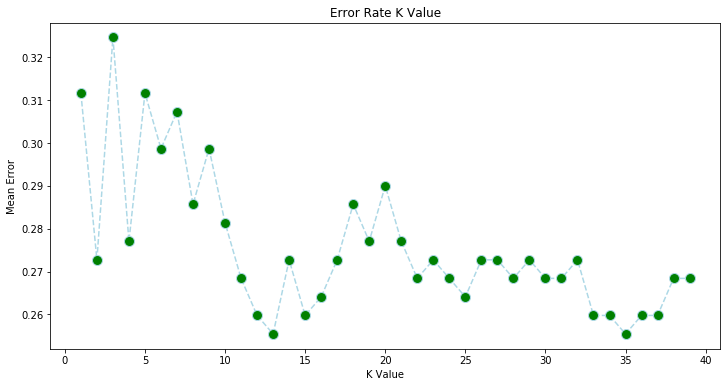

In [8]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='lightblue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')